In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# jupyter command so plots appear here, not in a new window
%matplotlib inline


In [2]:
matches = pd.read_csv("../data/raw/matches.csv")
teamstats = pd.read_csv("../data/raw/teamstats.csv")

print(matches.shape)
print(teamstats.shape)

(184069, 8)
(368138, 13)


In [3]:
matches.head()

,id,gameid,platformid,queueid,seasonid,duration,creation,version
0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
1,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675
2,12,3187269801,EUW1,420,8,1482,1495053375889,7.10.187.9675
3,13,3187252065,EUW1,420,8,1954,1495050993613,7.10.187.9675
4,14,3187201038,EUW1,420,8,2067,1495047893400,7.10.187.9675


In [4]:
teamstats.head()

,matchid,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
0,10,100,0,1,0,0,0,0,5,0,0,0,0
1,10,200,1,0,1,1,1,1,10,3,1,3,1
2,11,100,1,0,0,0,0,0,2,0,0,0,0
3,11,200,0,1,1,0,1,0,10,3,0,2,0
4,12,100,1,0,0,0,0,0,1,0,0,0,0


In [5]:
# here we divide the stats into those for blue and red team respectively
mask = teamstats["teamid"] == 100
blue = teamstats[mask].copy()

red  = teamstats[teamstats["teamid"] == 200].copy()

In [6]:
blue = blue.add_prefix("blue_")
red  = red.add_prefix("red_")

# changes the prefix-ed id back to original id
blue.rename(columns={"blue_matchid": "matchid"}, inplace=True)
red.rename(columns={"red_matchid": "matchid"}, inplace=True)

In [7]:
# here we merge all of the data along with blue/red stats into one table
matches_stats = matches.merge(blue, left_on="id", right_on="matchid")
matches_stats = matches_stats.merge(red, left_on="id", right_on="matchid")

matches_stats.shape

(184069, 34)

In [8]:

matches_stats.head()

,id,gameid,platformid,queueid,seasonid,duration,creation,version,matchid_x,blue_teamid,...,red_firsttower,red_firstinhib,red_firstbaron,red_firstdragon,red_firstharry,red_towerkills,red_inhibkills,red_baronkills,red_dragonkills,red_harrykills
0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,10,100,...,0,1,1,1,1,10,3,1,3,1
1,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675,11,100,...,1,1,0,1,0,10,3,0,2,0
2,12,3187269801,EUW1,420,8,1482,1495053375889,7.10.187.9675,12,100,...,1,1,0,1,0,11,3,0,2,0
3,13,3187252065,EUW1,420,8,1954,1495050993613,7.10.187.9675,13,100,...,0,1,1,0,0,9,2,1,2,0
4,14,3187201038,EUW1,420,8,2067,1495047893400,7.10.187.9675,14,100,...,1,1,1,1,0,7,1,1,3,0


In [9]:
print("Dataset shape:", matches_stats.shape)

print("\nColumns and types:\n", matches_stats.dtypes)

matches_stats.describe()

Dataset shape: (184069, 34)

Columns and types:
 id                   int64
gameid               int64
platformid          object
queueid              int64
seasonid             int64
duration             int64
creation             int64
version             object
matchid_x            int64
blue_teamid          int64
blue_firstblood      int64
blue_firsttower      int64
blue_firstinhib      int64
blue_firstbaron      int64
blue_firstdragon     int64
blue_firstharry      int64
blue_towerkills      int64
blue_inhibkills      int64
blue_baronkills      int64
blue_dragonkills     int64
blue_harrykills      int64
matchid_y            int64
red_teamid           int64
red_firstblood       int64
red_firsttower       int64
red_firstinhib       int64
red_firstbaron       int64
red_firstdragon      int64
red_firstharry       int64
red_towerkills       int64
red_inhibkills       int64
red_baronkills       int64
red_dragonkills      int64
red_harrykills       int64
dtype: object


,id,gameid,queueid,seasonid,duration,creation,matchid_x,blue_teamid,blue_firstblood,blue_firsttower,...,red_firsttower,red_firstinhib,red_firstbaron,red_firstdragon,red_firstharry,red_towerkills,red_inhibkills,red_baronkills,red_dragonkills,red_harrykills
count,184069.000000,1.840690e+05,184069.000000,184069.000000,184069.000000,1.840690e+05,184069.000000,184069.0,184069.000000,184069.000000,...,184069.000000,184069.000000,184069.000000,184069.000000,184069.000000,184069.000000,184069.000000,184069.000000,184069.00000,184069.000000
mean,95052.748632,3.094879e+09,404.109535,7.856434,1832.857064,1.491281e+12,95052.748632,100.0,0.507277,0.502638,...,0.471247,0.442014,0.331528,0.477897,0.218793,5.623446,1.008040,0.431854,1.44247,0.219293
std,53591.913586,3.188704e+08,82.017184,0.690973,509.742153,1.326276e+10,53591.913586,0.0,0.499948,0.499994,...,0.499174,0.496628,0.470764,0.499513,0.413429,3.890447,1.254117,0.620923,1.25329,0.414818
min,10.000000,4.576003e+08,4.000000,3.000000,190.000000,1.400522e+12,10.000000,100.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,48782.000000,3.164446e+09,420.000000,8.000000,1541.000000,1.493564e+12,48782.000000,100.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000
50%,95068.000000,3.177685e+09,420.000000,8.000000,1837.000000,1.494401e+12,95068.000000,100.0,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.00000,0.000000
75%,141563.000000,3.186252e+09,420.000000,8.000000,2145.000000,1.494979e+12,141563.000000,100.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,9.000000,2.000000,1.000000,2.00000,0.000000
max,187588.000000,3.197657e+09,440.000000,8.000000,4991.000000,1.496909e+12,187588.000000,100.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,12.000000,5.000000,7.00000,2.000000


In [10]:
# makes sure there's no missing values
matches_stats.isna().sum()


id                  0
gameid              0
platformid          0
queueid             0
seasonid            0
duration            0
creation            0
version             0
matchid_x           0
blue_teamid         0
blue_firstblood     0
blue_firsttower     0
blue_firstinhib     0
blue_firstbaron     0
blue_firstdragon    0
blue_firstharry     0
blue_towerkills     0
blue_inhibkills     0
blue_baronkills     0
blue_dragonkills    0
blue_harrykills     0
matchid_y           0
red_teamid          0
red_firstblood      0
red_firsttower      0
red_firstinhib      0
red_firstbaron      0
red_firstdragon     0
red_firstharry      0
red_towerkills      0
red_inhibkills      0
red_baronkills      0
red_dragonkills     0
red_harrykills      0
dtype: int64

In [11]:
#here we take (participant) id and win columns from stats1 and stats2 and combine them into one table 
stats1 = pd.read_csv("../data/raw/stats1.csv", 
    usecols=['id','win'],   # only loads the columns I need
    dtype={'id':int, 'win':int}  # forces integer
)

stats2 = pd.read_csv("../data/raw/stats2.csv", 
    usecols=['id','win'], 
    dtype={'id':int,'win':int}  
)


In [12]:
stats = pd.concat([stats1, stats2], ignore_index=True)
stats.head()

,id,win
0,9,0
1,10,0
2,11,0
3,12,0
4,13,0


In [13]:
# from participants we take (participant) id, match id and player (1-10, first 5 belong to the blue side, others to red)
participants = pd.read_csv(
    "../data/raw/participants.csv",
    usecols=["id", "matchid", "player"],
    dtype={"id": int, "matchid": int, "player": int}
)


In [14]:
# now merge participants and stats
participants_stats = stats.merge(
    participants,
    on="id",
    how="left"
)

participants_stats.head()

,id,win,matchid,player
0,9,0,10,1
1,10,0,10,2
2,11,0,10,3
3,12,0,10,4
4,13,0,10,5


In [15]:
# we will be adding blue wins column so we filter blue players
blue_players = participants_stats[participants_stats["player"] <= 5]

blue_wins = (blue_players.groupby("matchid")["win"].max().reset_index().rename(columns={"win": "blueWins"}))

blue_wins.head()

,matchid,blueWins
0,10,0
1,11,0
2,12,0
3,13,0
4,14,0


In [16]:
# merge into main matches_stats table
matches_stats = matches_stats.merge(
    blue_wins,
    left_on="id",
    right_on="matchid",
    how="left"
)

matches_stats.drop(columns=["matchid"], inplace=True)

matches_stats.head(10)

,id,gameid,platformid,queueid,seasonid,duration,creation,version,matchid_x,blue_teamid,...,red_firstinhib,red_firstbaron,red_firstdragon,red_firstharry,red_towerkills,red_inhibkills,red_baronkills,red_dragonkills,red_harrykills,blueWins
0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,10,100,...,1,1,1,1,10,3,1,3,1,0
1,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675,11,100,...,1,0,1,0,10,3,0,2,0,0
2,12,3187269801,EUW1,420,8,1482,1495053375889,7.10.187.9675,12,100,...,1,0,1,0,11,3,0,2,0,0
3,13,3187252065,EUW1,420,8,1954,1495050993613,7.10.187.9675,13,100,...,1,1,0,0,9,2,1,2,0,0
4,14,3187201038,EUW1,420,8,2067,1495047893400,7.10.187.9675,14,100,...,1,1,1,0,7,1,1,3,0,0
5,15,3187129136,EUW1,420,8,1593,1495044303031,7.10.187.9675,15,100,...,0,0,0,0,1,0,0,0,0,1
6,16,3187112816,EUW1,420,8,1589,1495042306859,7.10.187.9675,16,100,...,1,1,1,1,8,1,1,3,1,0
7,17,3186838875,EUW1,420,8,1664,1495026635492,7.10.187.9675,17,100,...,1,1,1,0,11,3,1,3,0,0
8,18,3186843487,EUW1,420,8,1875,1495024225924,7.10.187.9675,18,100,...,1,0,1,0,11,4,0,2,0,0
9,19,3184212544,EUW1,420,8,1541,1494859155283,7.9.186.8155,19,100,...,0,0,0,1,4,0,0,0,1,1


In [17]:
print(matches_stats.dtypes)

id                   int64
gameid               int64
platformid          object
queueid              int64
seasonid             int64
duration             int64
creation             int64
version             object
matchid_x            int64
blue_teamid          int64
blue_firstblood      int64
blue_firsttower      int64
blue_firstinhib      int64
blue_firstbaron      int64
blue_firstdragon     int64
blue_firstharry      int64
blue_towerkills      int64
blue_inhibkills      int64
blue_baronkills      int64
blue_dragonkills     int64
blue_harrykills      int64
matchid_y            int64
red_teamid           int64
red_firstblood       int64
red_firsttower       int64
red_firstinhib       int64
red_firstbaron       int64
red_firstdragon      int64
red_firstharry       int64
red_towerkills       int64
red_inhibkills       int64
red_baronkills       int64
red_dragonkills      int64
red_harrykills       int64
blueWins             int64
dtype: object


In [18]:
matches_stats = matches_stats.drop(
    columns=['matchid_x', 'matchid_y']
)
matches_stats.columns
matches_stats.head(20)

,id,gameid,platformid,queueid,seasonid,duration,creation,version,blue_teamid,blue_firstblood,...,red_firstinhib,red_firstbaron,red_firstdragon,red_firstharry,red_towerkills,red_inhibkills,red_baronkills,red_dragonkills,red_harrykills,blueWins
0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,100,0,...,1,1,1,1,10,3,1,3,1,0
1,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675,100,1,...,1,0,1,0,10,3,0,2,0,0
2,12,3187269801,EUW1,420,8,1482,1495053375889,7.10.187.9675,100,1,...,1,0,1,0,11,3,0,2,0,0
3,13,3187252065,EUW1,420,8,1954,1495050993613,7.10.187.9675,100,1,...,1,1,0,0,9,2,1,2,0,0
4,14,3187201038,EUW1,420,8,2067,1495047893400,7.10.187.9675,100,1,...,1,1,1,0,7,1,1,3,0,0
5,15,3187129136,EUW1,420,8,1593,1495044303031,7.10.187.9675,100,1,...,0,0,0,0,1,0,0,0,0,1
6,16,3187112816,EUW1,420,8,1589,1495042306859,7.10.187.9675,100,0,...,1,1,1,1,8,1,1,3,1,0
7,17,3186838875,EUW1,420,8,1664,1495026635492,7.10.187.9675,100,0,...,1,1,1,0,11,3,1,3,0,0
8,18,3186843487,EUW1,420,8,1875,1495024225924,7.10.187.9675,100,0,...,1,0,1,0,11,4,0,2,0,0
9,19,3184212544,EUW1,420,8,1541,1494859155283,7.9.186.8155,100,0,...,0,0,0,1,4,0,0,0,1,1


In [19]:
matches_stats["blueWins"].value_counts()

blueWins
1    95114
0    88955
Name: count, dtype: int64

In [20]:
# example 1: objective comparation to winning vs losing
objective_cols = [
    "blue_towerkills", "red_towerkills",
    "blue_dragonkills", "red_dragonkills",
    "blue_baronkills", "red_baronkills",
    "blue_inhibkills", "red_inhibkills"
]

matches_stats.groupby("blueWins")[objective_cols].mean()


,blue_towerkills,red_towerkills,blue_dragonkills,red_dragonkills,blue_baronkills,red_baronkills,blue_inhibkills,red_inhibkills
blueWins,,,,,,,,
0,2.763116,8.858715,0.830847,2.113675,0.159935,0.708437,0.175752,1.905761
1,8.793017,2.597672,1.994291,0.814728,0.615072,0.173182,1.898438,0.168450


In [21]:
# example 2: first objective impact
first_objectives = [
    "blue_firstblood", "blue_firsttower",
    "blue_firstdragon", "blue_firstbaron"
]

matches_stats.groupby("blueWins")[first_objectives].mean()


,blue_firstblood,blue_firsttower,blue_firstdragon,blue_firstbaron
blueWins,,,,
0,0.411365,0.289124,0.304154,0.114890
1,0.596978,0.702326,0.637404,0.482242


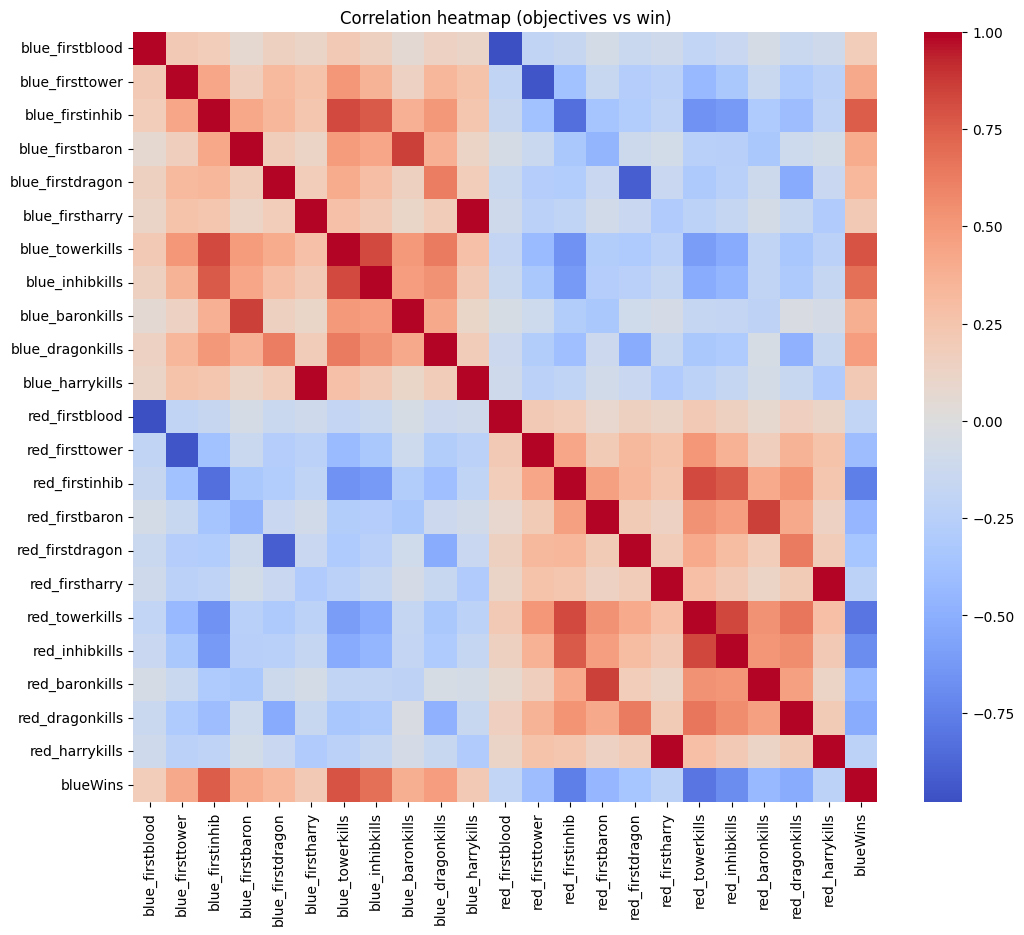

In [22]:
# example 3: correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(
    matches_stats.drop(columns=["id","gameid","platformid","version", "queueid", "seasonid", "creation", "red_teamid", "blue_teamid", "duration"]).corr(),
    cmap="coolwarm", center=0
)
plt.title("Correlation heatmap (objectives vs win)")
plt.show()


In [23]:
# calculate differences
matches_stats['tower_diff'] = (matches_stats['blue_towerkills'] - matches_stats['red_towerkills'])

matches_stats['dragon_diff'] = (matches_stats['blue_dragonkills'] - matches_stats['red_dragonkills'])

matches_stats['baron_diff'] = (matches_stats['blue_baronkills'] - matches_stats['red_baronkills'])

matches_stats['inhib_diff'] = (matches_stats['blue_inhibkills'] - matches_stats['red_inhibkills'])


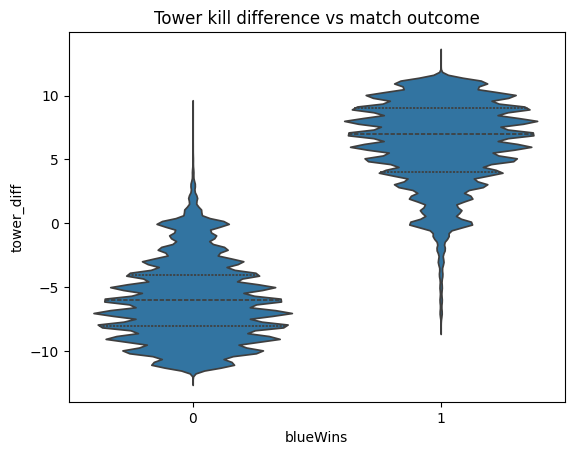

In [24]:
sns.violinplot(x='blueWins', y='tower_diff', data=matches_stats, inner="quartile")
plt.title("Tower kill difference vs match outcome")
plt.show()

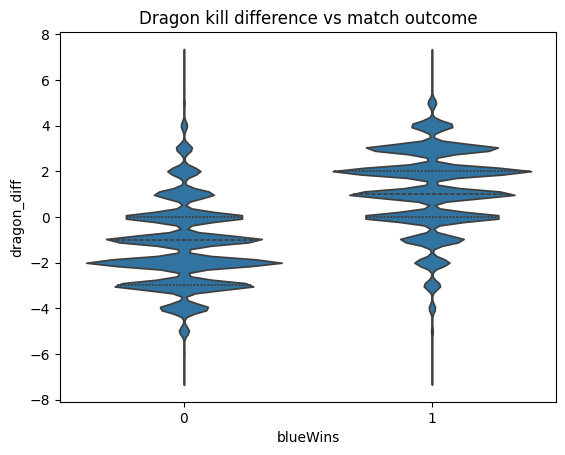

In [25]:
sns.violinplot(x='blueWins', y='dragon_diff', data=matches_stats, inner="quartile")
plt.title("Dragon kill difference vs match outcome")
plt.show()

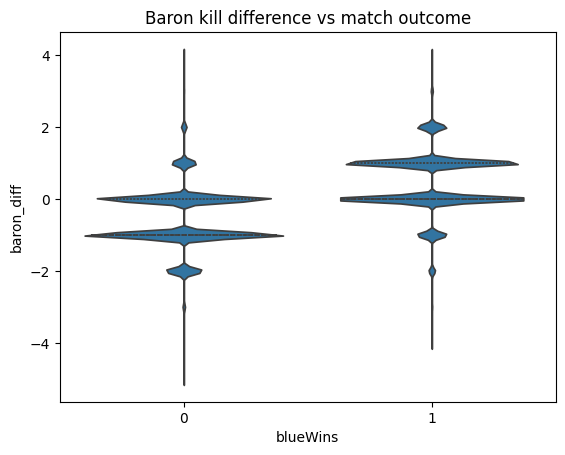

In [26]:
sns.violinplot(x='blueWins', y='baron_diff', data=matches_stats, inner="quartile")
plt.title("Baron kill difference vs match outcome")
plt.show()

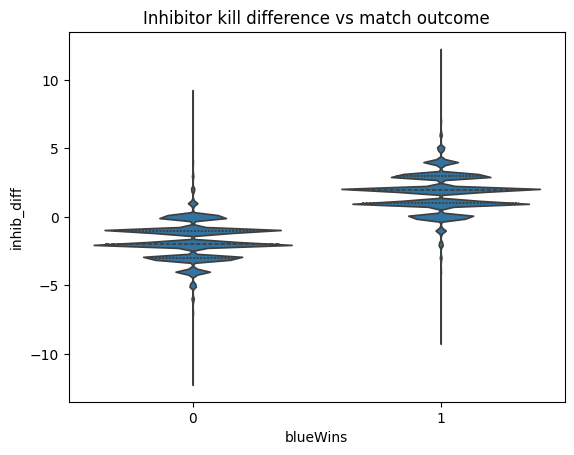

In [27]:
sns.violinplot(x='blueWins', y='inhib_diff', data=matches_stats, inner="quartile")
plt.title("Inhibitor kill difference vs match outcome")
plt.show()

In [28]:
# first objective impact
matches_stats.groupby('blue_firstdragon')['blueWins'].mean() 
# this tells us if they get the dragon, they win 69% of the games (and lose 31%), if they don't, they win 36% (and lose 64%)

blue_firstdragon
0    0.357808
1    0.691430
Name: blueWins, dtype: float64

In [29]:
matches_stats.groupby('blue_firstbaron')['blueWins'].mean()

blue_firstbaron
0    0.384791
1    0.817786
Name: blueWins, dtype: float64

In [30]:
matches_stats.groupby('blue_firsttower')['blueWins'].mean()

blue_firsttower
0    0.309266
1    0.722017
Name: blueWins, dtype: float64

In [31]:
matches_stats.groupby('blue_firstinhib')['blueWins'].mean()

blue_firstinhib
0    0.160692
1    0.917699
Name: blueWins, dtype: float64

In [32]:
matches_stats.groupby('blue_firstblood')['blueWins'].mean()

blue_firstblood
0    0.422658
1    0.608103
Name: blueWins, dtype: float64

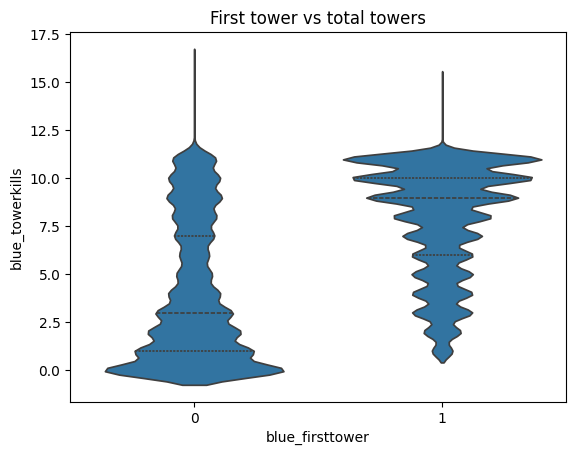

In [33]:
# snowballing
sns.violinplot(x='blue_firsttower', y='blue_towerkills', data=matches_stats, inner="quartile")
plt.title("First tower vs total towers")
plt.show()

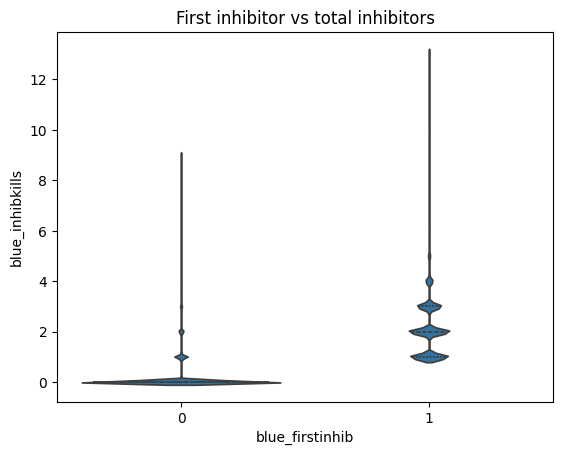

In [34]:
sns.violinplot(x='blue_firstinhib', y='blue_inhibkills', data=matches_stats, inner="quartile")
plt.title("First inhibitor vs total inhibitors")
plt.show()

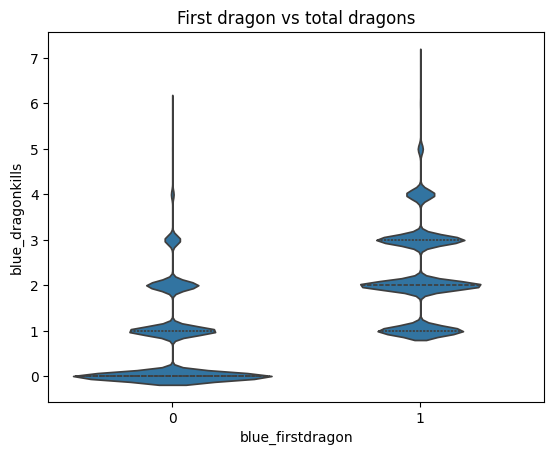

In [35]:
sns.violinplot(x='blue_firstdragon', y='blue_dragonkills', data=matches_stats, inner="quartile")
plt.title("First dragon vs total dragons")
plt.show()

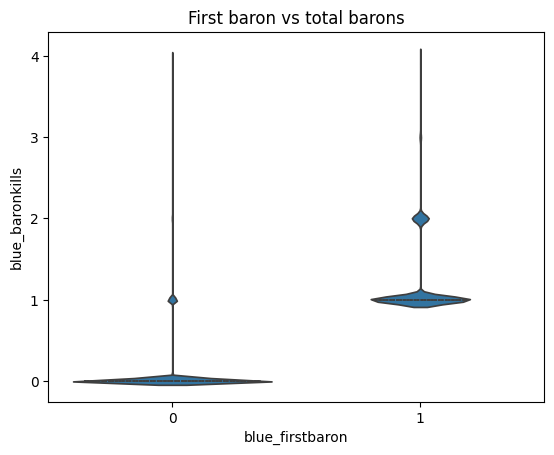

In [36]:
sns.violinplot(x='blue_firstbaron', y='blue_baronkills', data=matches_stats, inner="quartile")
plt.title("First baron vs total barons")
plt.show()

In [37]:
# which objectives matter the most - correlation, i.e. the higher the correlation - larger tower differences are strongly associated with blue wins
diff_cols = ['tower_diff', 'inhib_diff', 'dragon_diff', 'baron_diff'
]

corr = matches_stats[diff_cols + ['blueWins']].corr()['blueWins'].sort_values(ascending=False)

print(corr)

blueWins       1.000000
tower_diff     0.889149
inhib_diff     0.801666
dragon_diff    0.576391
baron_diff     0.522810
Name: blueWins, dtype: float64


In [38]:
matches_stats.columns

Index(['id', 'gameid', 'platformid', 'queueid', 'seasonid', 'duration',
       'creation', 'version', 'blue_teamid', 'blue_firstblood',
       'blue_firsttower', 'blue_firstinhib', 'blue_firstbaron',
       'blue_firstdragon', 'blue_firstharry', 'blue_towerkills',
       'blue_inhibkills', 'blue_baronkills', 'blue_dragonkills',
       'blue_harrykills', 'red_teamid', 'red_firstblood', 'red_firsttower',
       'red_firstinhib', 'red_firstbaron', 'red_firstdragon', 'red_firstharry',
       'red_towerkills', 'red_inhibkills', 'red_baronkills', 'red_dragonkills',
       'red_harrykills', 'blueWins', 'tower_diff', 'dragon_diff', 'baron_diff',
       'inhib_diff'],
      dtype='object')

In [39]:
matches_stats.to_csv('../data/processed/matches_stats.csv', index=False)
print(f"Exported matches_stats successfully.")

Exported matches_stats successfully.
